# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:T2G2M-23
- Names:  Omer Muzffar Cheema, Muhammad Kazim
- Student IDs:  220087771, 218200403 
- Emails:  
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
from scipy import stats
import matplotlib
import os
from zipfile import ZipFile
from ipywidgets import IntProgress
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ipywidgets import IntProgress
from IPython.display import display
from zipfile import ZipFile

all_files = ZipFile('HTWebLog_p1.zip','r')
files = all_files.namelist()

data = []
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']

ProgressBar = IntProgress(value=0,min=0,max=len(files),step=1,
                          description='Loading:',bar_style='',orientation='horizontal')
display(ProgressBar)

for name in all_files.namelist():
    ProgressBar.value += 1
    load_file = pd.read_csv(all_files.open(name),
                            delim_whitespace=True,
                            na_values='-',
                            skiprows = 4,
                            usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                            header=None,
                            encoding='iso-8859-1',
                            names=ColumnNames,
                            error_bad_lines=False,
                            warn_bad_lines=False,
                            dtype={'date': str,'time': str,'s-sitename': str, 's-ip': str,'cs-method': str,'cs-uri-stem': str,
                                   'cs-uri-query': str,'s-port': str,'cs-username': str,'c-ip': str,'cs(User-Agent)': str,
                                   'cs(Referer)': str, 'sc-status': str,'sc-substatus': str,'sc-win32-status': str})
    
    
    load_file = load_file[~load_file['date'].str.startswith("#")]
    
    data.append(load_file)


df_ht_new = pd.concat(data)


print ('Finished loading', ProgressBar.value, 'web log files.')

IntProgress(value=0, description='Loading:', max=120)

Finished loading 120 web log files.


In [3]:
df_ht_new.describe()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
count,8438928,8438928,8438928,8438928,8438928,8438928,552396,8438928,0,8438928,8435401,7129934,8438928,8438928,8438928
unique,121,86372,1,1,6,4761,1987,1,0,74548,4958,39714,12,4,14
top,2006-12-12,08:37:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
freq,120190,382,8438928,8438928,8421984,402987,231265,8438928,NaN,93769,1982248,1618649,6074386,8438223,8057000


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [4]:
#Checking columns with null values
df_ht_new.isnull().sum()

date                     0
time                     0
s-sitename               0
s-ip                     0
cs-method                0
cs-uri-stem              0
cs-uri-query       7886532
s-port                   0
cs-username        8438928
c-ip                     0
cs(User-Agent)        3527
cs(Referer)        1308994
sc-status                0
sc-substatus             0
sc-win32-status          0
dtype: int64

In [6]:
#Calculating null percentage from top null columns as shown above
cs_uri_query_null_avg=((df_ht_new['cs-uri-query'].isnull().sum())/len(df_ht_new))*100
cs_username_null_avg=((df_ht_new['cs-username'].isnull().sum())/len(df_ht_new))*100
cs_Referer_null_avg=((df_ht_new['cs(Referer)'].isnull().sum())/len(df_ht_new))*100
print("Cs-uri-query null values in percentage={}%".format(cs_uri_query_null_avg))
print("Cs-username null values in percentage={}%".format(cs_username_null_avg))
print("Cs(Referere) null values in percentage={}%".format(cs_Referer_null_avg))

Cs-uri-query null values in percentage=93.45419228603443%
Cs-username null values in percentage=100.0%
Cs(Referere) null values in percentage=15.51137774845336%


In [7]:
#As these 03 columns have more than 15% null values so  them from dataset
df_ht_new.drop(['cs-uri-query','cs-username','cs(Referer)'], axis = 1,inplace=True)

In [8]:
#Removing rows with NA's
df_ht_new.dropna(axis = 0, inplace= True) 

In [9]:
# only 30% of total data are selected for classification

#Your code to show the number of requests in weblog_df

#Selecting 30% data as per requirement
weblog_df = df_ht_new.sample(frac = 0.3, random_state=1)

In [10]:
print ('Total Rows after removal of null data', len(weblog_df))

Total Rows after removal of null data 2530620


In [11]:
weblog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 25357 to 33575
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   time             object
 2   s-sitename       object
 3   s-ip             object
 4   cs-method        object
 5   cs-uri-stem      object
 6   s-port           object
 7   c-ip             object
 8   cs(User-Agent)   object
 9   sc-status        object
 10  sc-substatus     object
 11  sc-win32-status  object
dtypes: object(12)
memory usage: 251.0+ MB


In [12]:
#Your code to remove missing values as required.
df_ht_new.replace({"-":np.nan},inplace=True)

In [13]:
df_ht_new.isnull().sum()

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64

In [16]:
#weblog_df.to_csv('web_logs.csv',index=0)

### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'cs_ip'*,*'cs_uri_stem'*,*'cs(Referer)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [14]:
# Your code for feature selection
weblog_df.drop(['date','time','s-sitename','s-ip','s-port','sc-substatus','sc-win32-status'], axis = 1,inplace=True)





In [15]:
#Your code to show the top 5 rows of ml_df
ml_df=pd.DataFrame(weblog_df)
ml_df.head()

,cs-method,cs-uri-stem,c-ip,cs(User-Agent),sc-status
25357,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,218.102.231.100,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
89819,GET,/Tulip/common/en-us/images/top_logo.gif,218.190.226.30,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
19333,GET,/Tulip/common/en-us/images/sectionbanner_about...,203.241.147.26,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
29761,GET,/Tulip/public/2899_2.jpg,203.85.132.97,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
52909,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,218.186.9.5,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


In [16]:
ml_df.isnull().sum()

cs-method         0
cs-uri-stem       0
c-ip              0
cs(User-Agent)    0
sc-status         0
dtype: int64

In [17]:
ml_df = ml_df.astype(str)

## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [20]:
from sklearn import preprocessing
le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)
le_df.head()

,cs-method,cs-uri-stem,c-ip,cs(User-Agent),sc-status
25357,0,2125,26069,862,0
89819,0,2119,31171,1385,0
19333,0,2093,18482,572,4
29761,0,2741,18825,1385,0
52909,0,2125,30001,1725,0


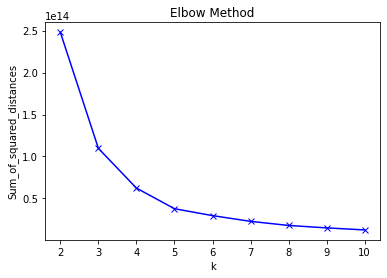

In [22]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
#le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)
x_df=le_df.drop('sc-status',axis=1)
y_df=le_df['sc-status']
Sum_of_squared_distances=[]
K=range(2,11)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [23]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.1.1-bin-hadoop2.7'

In [24]:
import pyspark

In [3]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [20]:
schema = StructType([StructField("sc-status", IntegerType(), True),
                     StructField("cs-method", IntegerType(), True),
                     StructField("c-ip", IntegerType(), True),
                     StructField("cs-uri-stem", IntegerType(), True),
                     StructField("cs(User-Agent)", IntegerType(), True)])

lr_df = spark.createDataFrame(le_df, schema)

In [21]:
lr_df_new=lr_df.sample(fraction=0.1,seed=1)

In [22]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs-method', 'c-ip', 'cs-uri-stem', 'cs(User-Agent)'],outputCol="features")
df_temp = vector_assembler.transform(lr_df_new )
df_temp.show(3)

+---------+---------+-----+-----------+--------------+--------------------+
|sc-status|cs-method| c-ip|cs-uri-stem|cs(User-Agent)|            features|
+---------+---------+-----+-----------+--------------+--------------------+
|        0|     2165|14204|       1398|             1|[2165.0,14204.0,1...|
|        0|     2895|47341|       1545|             1|[2895.0,47341.0,1...|
|        0|     2133|19538|        560|             1|[2133.0,19538.0,5...|
+---------+---------+-----+-----------+--------------+--------------------+
only showing top 3 rows



In [23]:
df_lr = df_temp.drop('cs-method', 'c-ip', 'cs-uri-stem', 'cs(User-Agent)')
df_lr.show(3)

+---------+--------------------+
|sc-status|            features|
+---------+--------------------+
|        0|[2165.0,14204.0,1...|
|        0|[2895.0,47341.0,1...|
|        0|[2133.0,19538.0,5...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [24]:
#Create the data sets for training and testing
(trainingData, testData) = df_lr.randomSplit([0.7, 0.3])

In [25]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lr = LogisticRegression(featuresCol='features', labelCol='sc-status')
model = lr.fit(trainingData)


# Your code contains trainning from train data and predicting based on the test data



In [26]:
predictions = model.transform(testData)

In [27]:
predictions.select("features","sc-status","prediction").show(5)

+--------------------+---------+----------+
|            features|sc-status|prediction|
+--------------------+---------+----------+
|[6.0,1922.0,1398....|        0|       0.0|
|[6.0,2068.0,1545....|        0|       0.0|
|[6.0,2171.0,1398....|        0|       0.0|
|[6.0,2954.0,1592....|        0|       0.0|
|[6.0,3286.0,1398....|        0|       0.0|
+--------------------+---------+----------+
only showing top 5 rows



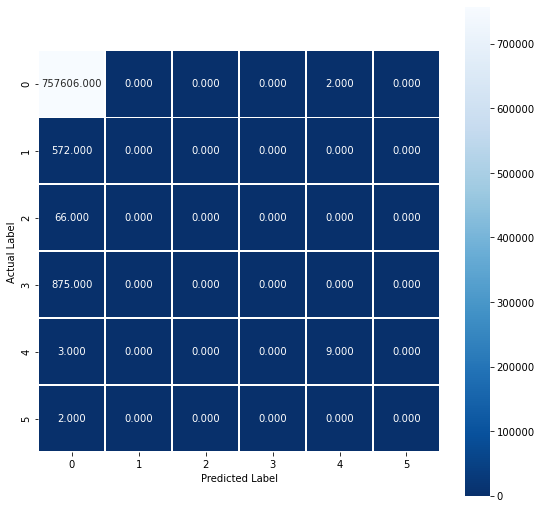

In [46]:
# Your code to display TP, TN, FP, FN
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_true = predictions.select("sc-status")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()
confusion=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(9,9))
import seaborn as sns
sns.heatmap(confusion,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');



In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="sc-status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy= = %g" % (accuracy))

Accuracy= = 0.998147


In [29]:
trainingsummary=model.summary

In [31]:
fmeasure=trainingsummary.weightedFMeasure()
accuracy=trainingsummary.accuracy
precision=trainingsummary.weightedPrecision
recall=trainingsummary.weightedRecall
tp=trainingsummary.weightedTruePositiveRate
fp=trainingsummary.weightedFalsePositiveRate
print("Accuracy={}".format(accuracy))
print("Fmeasure={}".format(fmeasure))
print("Precision={}".format(precision))
print("Recall={}".format(recall))
print("TP={}".format(tp))
print("FP={}".format(fp))

Accuracy=0.9981329984045623
Fmeasure=0.9972003698645754
Precision=0.9962694825829661
Recall=0.9981329984045623
TP=0.9981329984045623
FP=0.9861569505003706


In [ ]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [24]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
lr = LogisticRegression(featuresCol='features', labelCol='sc-status')
paramgrid=(ParamGridBuilder()
    .addGrid(lr.regParam,[0.1,0.01])
    .addGrid(lr.fitIntercept,[False,True])
    .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])
          .build())
crossval=CrossValidator(estimator=lr,
                       estimatorParamMaps=paramgrid,
                       evaluator=MulticlassClassificationEvaluator().setLabelCol("sc-status"),
                       numFolds=2)






In [74]:
lr = LogisticRegression(featuresCol='features', labelCol='sc-status')
pipeline = Pipeline(stages=[lr])
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5])
             .build())

In [75]:
crossval=CrossValidator(estimator=pipeline,
                       estimatorParamMaps=paramgrid,
                       evaluator=MulticlassClassificationEvaluator().setLabelCol("sc-status"),
                       numFolds=2)


In [76]:
cvmodel=crossval.fit(trainingData)

In [81]:
best_model = cvmodel.bestModel

In [84]:
print(cvmodel.getEstimatorParamMaps()[np.argmax(cvmodel.avgMetrics)])

{Param(parent='LogisticRegression_a7c9b342e9fa', name='regParam', doc='regularization parameter (>= 0).'): 0.1, Param(parent='LogisticRegression_a7c9b342e9fa', name='fitIntercept', doc='whether to fit an intercept term.'): False, Param(parent='LogisticRegression_a7c9b342e9fa', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}


In [20]:
#Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="sc-status", featuresCol="features", maxDepth=2)
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dt.maxBins, [10, 20, 40, 80, 100])
             .build())

dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = MulticlassClassificationEvaluator().setLabelCol("sc-status"),
                      numFolds = 2)

# Run cross validations
dtcvModel = dtcv.fit(trainingData)
print(dtcvModel)


CrossValidatorModel_2fed937aba0e


In [22]:
print(dtcvModel.getEstimatorParamMaps()[np.argmax(dtcvModel.avgMetrics)])

{Param(parent='DecisionTreeClassifier_2b3689b63abd', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 10, Param(parent='DecisionTreeClassifier_2b3689b63abd', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 100}


In [24]:
dtpredictions = dtcvModel.transform(testData)


# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy:', MulticlassClassificationEvaluator().setLabelCol("sc-status").evaluate(dtpredictions))

Accuracy: 0.9991445482559423


In [25]:
#Random Forest
rf = RandomForestClassifier(labelCol="sc-status", featuresCol="features")
pipeline = Pipeline(stages=[rf])
rfparamGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 5, 10, 20])
             .addGrid(rf.maxBins, [10, 20, 40, 80])
             .addGrid(rf.numTrees, [5, 20, 50, 100])
             .build())
rfcv = CrossValidator(estimator = pipeline,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = MulticlassClassificationEvaluator().setLabelCol("sc-status"),
                      numFolds = 2)
rfcvModel = rfcv.fit(trainingData)
print(rfcvModel)

CrossValidatorModel_49da89fb723d


In [26]:
print(rfcvModel.getEstimatorParamMaps()[np.argmax(rfcvModel.avgMetrics)])

{Param(parent='RandomForestClassifier_563e332f0f36', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 20, Param(parent='RandomForestClassifier_563e332f0f36', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 80, Param(parent='RandomForestClassifier_563e332f0f36', name='numTrees', doc='Number of trees to train (>= 1).'): 20}


In [27]:
rfpredictions = rfcvModel.transform(testData)


# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy:', MulticlassClassificationEvaluator().setLabelCol("sc-status").evaluate(rfpredictions))

Accuracy: 0.9990526937990197


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**:   
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=f851eb5aa031174e952b27550aaef8e1415db2fe8a94cab5b0ce90b1b52bac12
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [26]:
import pandas as pd
import numpy as np
weblog_df=pd.read_csv('web_logs.csv',header=None)
# weblog_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# junk_val = weblog_df[weblog_df['cs-method'] == 's-ip'].index
# weblog_df.drop(junk_val , inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
indexNames = weblog_df[ weblog_df['sc-status'] == 'cs(Referer)' ].index
weblog_df.drop(indexNames , inplace=True)

In [28]:
weblog_df

,0,1,2,3,4
0,cs-method,cs-uri-stem,c-ip,cs(User-Agent),sc-status
1,GET,/Tulip/aboutus/images/photo_facilities_bizcent...,202.89.22.3,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2,GET,/Tulip/common/en-us/images/btn_booking.gif,220.246.166.38,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
3,GET,/Tulip/common/images/bar_2.jpg,24.84.236.209,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
4,GET,/Tulip/common/images/dot.jpg,203.198.249.242,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
...,...,...,...,...,...
2531694,GET,/Tulip/dining/en-us/images/btn_whatsNew.gif,202.155.239.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
2531695,GET,/Tulip/common/zh-hk/images/sectionbanner_whats...,202.64.177.153,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2531696,GET,/Tulip/common/en-us/images/top_img.jpg,222.167.151.21,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2531697,GET,/Tulip/whatsnew/images/rightmenu_bg.gif,219.77.251.72,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304


In [11]:
new_header = weblog_df.iloc[0] 

weblog_df = weblog_df[1:] 

weblog_df.columns = new_header

In [13]:
weblog_df.shape

(2530641, 5)

In [29]:
# you can also use PySpark package, if preferred
from apyori import apriori
records = []
for i in range(0, 2531699):
    records.append([str(weblog_df.values[i,j]) for j in range(0, 5)])
# Your code



In [ ]:
association_rules = apriori(records, min_support=0.000055, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [35]:
print(len(association_results))

2


In [32]:
print(association_results[0])

RelationRecord(items=frozenset({'/favicon.ico', '404'}), support=0.005613202346757205, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/favicon.ico'}), items_add=frozenset({'404'}), confidence=0.632063718074219, lift=58.769385294891414), OrderedStatistic(items_base=frozenset({'404'}), items_add=frozenset({'/favicon.ico'}), confidence=0.5219164492780247, lift=58.769385294891414)])


In [33]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: /favicon.ico -> 404
Support: 0.005613202346757205
Confidence: 0.632063718074219
Lift: 58.769385294891414
Rule: /favicon.ico -> GET
Support: 0.005612807189957011
Confidence: 0.6320192222123343
Lift: 58.83875056169826


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

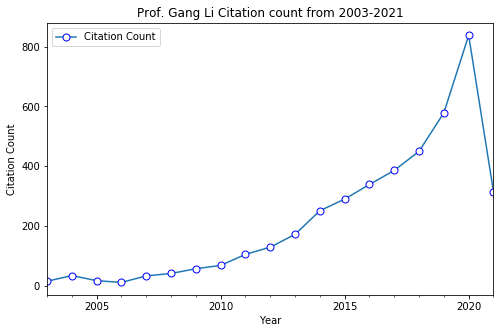

In [21]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
#create_df = pd.DataFrame()
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt

source=requests.get('https://scholar.google.com/citations?hl=en&user=dqwjm-0AAAAJ#d=gsc_md_hist').text
soup=bs(source,'html.parser')
citation_year=soup.find_all(class_='gsc_g_t')
citation_count=soup.find_all(class_='gsc_g_al')
cit_nam=[]
for i,j in zip(citation_year,citation_count):
    cit_nam.append({"Year":i.text,"Citation Count":j.text})
citation_info=pd.DataFrame(cit_nam)
citation_info.to_csv("Citation2003-2021.csv")

citation_info_new=citation_info.copy()
citation_info['Year']=pd.to_datetime(citation_info['Year'], format='%Y')
citation_info['Citation Count']=pd.to_numeric(citation_info['Citation Count'])
citation_info.plot(x='Year',y='Citation Count',
                   kind = 'line',marker='.',
                   linestyle='solid',
                   mfc='none', mec='b',
                   markersize=14,
                   markerfacecolor='white',
                   figsize= (8,5))
plt.title("Prof. Gang Li Citation count from 2003-2021")
plt.ylabel("Citation Count")
plt.show()

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [22]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test
from statsmodels.tsa.arima.model import ARIMA
from pandas import read_csv

series = read_csv("Citation2003-2021.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.set_index('Year',inplace=True)
X = series.values
#X = citation_info_new['Citation Count']
X = X.astype('float32')
size = len(X) - 4
train, test = X[0:size], X[size:]

# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
# forecast
result = model_fit.get_forecast()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.283
Date:                Fri, 21 May 2021   AIC                            130.565
Time:                        17:13:38   BIC                            132.482
Sample:                             0   HQIC                           130.388
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9486      0.240      3.950      0.000       0.478       1.419
ma.L1         -0.4599      0.652     -0.705      0.481      -1.738       0.818
sigma2       387.7367    165.805      2.339      0.0

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well
# Print the error below by comparing the test and preds:



In [23]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Your code to show the performance RMSE
history = [x for x in train]
predictions = list()
confidence_interval = []
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = result.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))
    

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))

# Your code to show the performance RMSE
print('Test RMSE: %.3f' % rmse)

predicted=429.164660, expected=450.000000
95% Interval: 390.571 to 467.758
predicted=502.372082, expected=579.000000
95% Interval: 390.571 to 467.758
predicted=677.221025, expected=838.000000
95% Interval: 390.571 to 467.758
predicted=1128.650505, expected=315.000000
95% Interval: 390.571 to 467.758
Test RMSE: 416.588


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

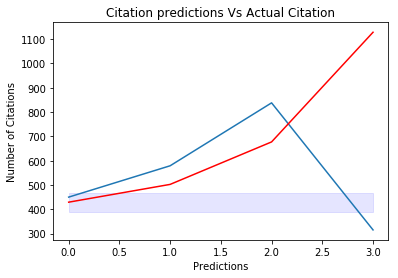

In [24]:
# You code: Visualize as required, the prediction with its confidence interval
# plot forecasts against actual outcomes
from matplotlib import pyplot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.fill_between(list(range(len(test))),
                 np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
                alpha=0.1, color='b')
pyplot.title("Citation predictions Vs Actual Citation")
pyplot.xlabel("Predictions")
pyplot.ylabel("Number of Citations")
pyplot.show()


## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [25]:
#Grid search for best parameter set
series = read_csv("Citation2003-2021.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.set_index('Year',inplace=True)
X = series.values
RMSE = []
PARAMETER = []

def evaluate_arima_model(X, arima_order):
    #prepare training dataset
    X = X.astype('float32')
    size = len(X) - 4
    train, test = X[0:size], X[size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    RMSE.append(rmse)
                    PARAMETER.append(order)
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(1, 3)
d_values = range(1, 3)
q_values = range(1, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)



ARIMA(1, 1, 1) RMSE=416.588
ARIMA(1, 1, 2) RMSE=421.835
ARIMA(1, 2, 1) RMSE=436.193
ARIMA(1, 2, 2) RMSE=440.049
ARIMA(2, 1, 1) RMSE=425.939
ARIMA(2, 1, 2) RMSE=427.910
ARIMA(2, 2, 1) RMSE=439.192
ARIMA(2, 2, 2) RMSE=451.824
Best ARIMA(1, 1, 1) RMSE=416.588


In [26]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.to_csv("Search-results.csv")
Results.head(6)




,RMSE,Parameter
0,416.588218,"(1, 1, 1)"
1,421.835179,"(1, 1, 2)"
2,436.193230,"(1, 2, 1)"
3,440.049433,"(1, 2, 2)"
4,425.939270,"(2, 1, 1)"
5,427.909571,"(2, 1, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [27]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]

import math
actual_citation = read_csv("Citation2003-2021.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
actual_citation=actual_citation[:-1]
series=actual_citation.copy()
test_cit=actual_citation.copy()

series.set_index('Year',inplace=True)
X = series.values
X = X.astype('float32')
#size = len(X) - 1
#train = X[0:size]
train=X
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=2)

result = model_fit.get_forecast(2,alpha=0.05)

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -87.956
Date:                Fri, 21 May 2021   AIC                            181.913
Time:                        17:14:12   BIC                            184.413
Sample:                             0   HQIC                           182.161
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9393      0.134      7.008      0.000       0.677       1.202
ma.L1          0.4177      0.505      0.827      0.408      -0.572       1.408
sigma2      1535.5460    813.114      1.888      0.0

In [28]:
# Your code to predict for 2021 and 2022
# Your code to show the performance RMSE
confidence_interval=[]
predictions=[]
for f in forecast:
    print('predicted=%f'% math.ceil(f))
    train=np.append(train,math.ceil(f))
    predictions.append(math.ceil(f))
    ci = result.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))
Predict_citation=pd.DataFrame(train)
final_citation=pd.concat([actual_citation,Predict_citation],axis=1)
final_citation['Citation Count']=final_citation[0]
final_citation.drop([0],axis=1,inplace=True)
lower_series = pd.Series(ci[:, 0])
upper_series = pd.Series(ci[0:, 1])

predicted=1129.000000
95% Interval: 1051.847 to 1205.454
predicted=1402.000000
95% Interval: 1051.847 to 1205.454


In [29]:
#actual_citation.rename(columns={'Citation Count':'Citation'},inplace=True)
actual_citation =actual_citation.append({'Year': "2021", "Citation Count": 0}, ignore_index=True)
actual_citation =actual_citation.append({'Year': "2022", "Citation Count": 0}, ignore_index=True)
actual_citation['Predicted_Citations']=0
actual_citation.rename(columns={'Citation Count':'Actual_Citations'},inplace=True)
actual_citation.loc[actual_citation.Year=="2021", "Predicted_Citations"] = 1129
actual_citation.loc[actual_citation.Year=="2022", "Predicted_Citations"] = 1402
actual_citation[actual_citation.eq(0)] = np.nan
actual_citation['Year']=pd.to_datetime(actual_citation['Year'],format='%Y')
actual_citation.set_index('Year',inplace=True)
actual_citation

,Actual_Citations,Predicted_Citations
Year,,
2003-01-01,15.0,NaN
2004-01-01,34.0,NaN
2005-01-01,17.0,NaN
2006-01-01,11.0,NaN
2007-01-01,33.0,NaN
2008-01-01,41.0,NaN
2009-01-01,57.0,NaN
2010-01-01,68.0,NaN
2011-01-01,105.0,NaN


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

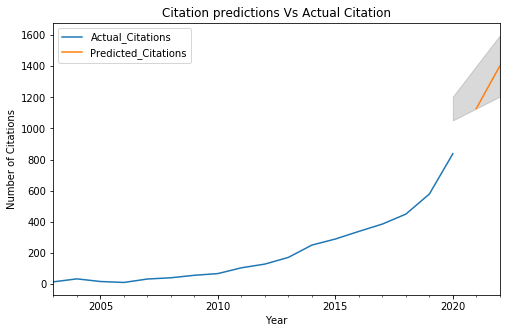

In [30]:
# Plot the points and the prediction with its confidence interval
#actual_citation['Year']=pd.to_datetime(actual_citation['Year'],format='%Y')
actual_citation[['Actual_Citations','Predicted_Citations']].plot(figsize= (8,5))
x=['2020-01-01','2022-01-01']
plt.fill_between(x, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title("Citation predictions Vs Actual Citation")
#pyplot.xlabel("Predictions")
plt.ylabel("Number of Citations")
plt.legend(loc='upper left')
plt.show()


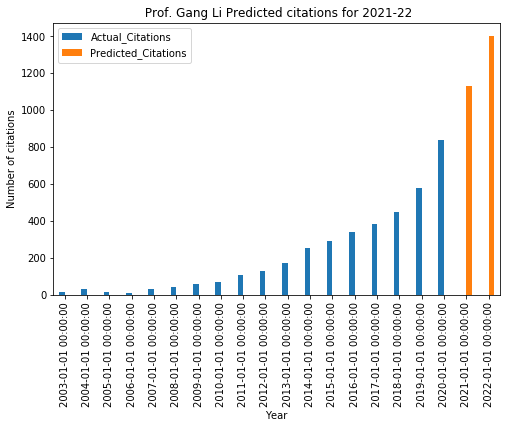

In [31]:
actual_citation[['Actual_Citations','Predicted_Citations']].plot(figsize= (8,5),kind='bar',
                                                                 ylabel='Number of citations',
                                                                 title=' Prof. Gang Li Predicted citations for 2021-22')

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
